## Step 1: Import | Install packages and libraries


In [1]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize 
from bs4 import BeautifulSoup as bs
import requests as r
import pandas as pd
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ansulsinha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ansulsinha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 2: Load Data


In [3]:
reviews = pd.read_json('test_data/reviews.json')

## Step 3: Clean the data using python module NLTK. Remove stopwords (unnecessary words)


In [4]:
stop = stopwords.words('english')
reviews['removed_stopwords_reviews'] = reviews['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Step 4: Reload "cleaned reviews" into reviews json (new column). 


In [5]:
reviews['removed_stopwords_reviews']

0       We paired tonight's meal finest- "Josh" brand ...
1       Best DTF Seattle (a lot better one Downtown Be...
2       Food: ExcellentService: GoodNo matter location...
3       After several days heavy creamy chowders, I cr...
4       Expensive dim sum, even Seattle area, paying e...
5       Food wise, decent.Service wise, time people wo...
6       Love, love, loved dumpling house. Great place ...
7       My husband I went Friday night 6pm. It PACKED....
8       Ok ok, I want take sec say thank God blessing ...
9       We've always great experiences Din Tai Fung lo...
10      I brought bunch non-Chinese people dinner ever...
11      This resto disappoint. They always good servic...
12      They never disappoint. This first time going l...
13      Every time I come Din Tai Fung, I like I learn...
14      Awh man!!!! What love freaking Din Tai Fung, w...
15      Hong Kong favorite DTF location Seattle. We kn...
16      Our quoted wait 45 minutes 5 PM Saturday party...
17      Always

## Step 5: Determine if a review is "good" or "bad" based on ratings (0 is bad, 1 is good).


In [6]:
reviews.loc[reviews.stars <= 3, 'category'] = 0 
reviews.loc[reviews.stars > 3, 'category'] = 1 
reviews


,resId,review,reviewDate,reviewId,stars,removed_stopwords_reviews,category
0,1,We paired tonight's meal with only the finest-...,11/14/2019,1,5,"We paired tonight's meal finest- ""Josh"" brand ...",1.0
1,1,Best DTF in Seattle (a lot better than the one...,11/12/2019,2,5,Best DTF Seattle (a lot better one Downtown Be...,1.0
2,1,Food: ExcellentService: GoodNo matter where th...,11/11/2019,3,5,Food: ExcellentService: GoodNo matter location...,1.0
3,1,"After several days of heavy creamy chowders, I...",10/23/2019,4,5,"After several days heavy creamy chowders, I cr...",1.0
4,1,"Expensive for dim sum, even in the Seattle are...",11/8/2019,5,4,"Expensive dim sum, even Seattle area, paying e...",1.0
5,1,"Food wise, it was decent.Service wise, most of...",10/5/2019,6,3,"Food wise, decent.Service wise, time people wo...",0.0
6,1,"Love, love, loved this dumpling and more house...",9/15/2019,7,5,"Love, love, loved dumpling house. Great place ...",1.0
7,1,My husband and I went on Friday night at 6pm. ...,9/20/2019,8,4,My husband I went Friday night 6pm. It PACKED....,1.0
8,1,"Ok ok, I want to take a sec to say thank you t...",9/9/2019,9,5,"Ok ok, I want take sec say thank God blessing ...",1.0
9,1,We've always had great experiences at Din Tai ...,9/27/2019,10,5,We've always great experiences Din Tai Fung lo...,1.0


## Step 6: Split "good" and "bad" reviews. Determine most used word in good reviews versus bad reviews. Classify adjectives as good or bad using NLP. Create relationship between reviews and rating. 


In [7]:
good_revs = reviews[reviews['category'] == 1]
bad_revs = reviews[reviews['category'] == 0]

In [8]:
from textblob import TextBlob

good_reviews = TextBlob(" ".join(review for review in good_revs.removed_stopwords_reviews))


In [9]:
goodList = []
for noun_phrase in good_reviews.noun_phrases:
    goodList.append(noun_phrase)

In [10]:
import collections
counter=collections.Counter(goodList)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(30))


[('seattle', 154), ('korean', 81), ('overall', 68), ('happy hour', 55), ("ca n't", 52), ('definitely', 48), ('thai', 46), ('came', 45), ('love', 44), ('ave', 32), ('yelp', 27), ('will', 26), ('loved', 23), ('really', 23), ('nice', 22), ('wow', 22), ('uw', 20), ('delicious', 20), ('went', 19), ('amazing', 18), ('highly', 16), ('ca', 16), ('got', 15), ('great food', 15), ('fremont', 15), ('honestly', 14), ('favorite dish', 14), ('great service', 14), ('food good', 14), ('so', 14)]


In [11]:
bad_reviews = TextBlob(" ".join(review for review in bad_revs.removed_stopwords_reviews))

In [12]:
badList = []
for noun_phrase in bad_reviews.noun_phrases:
    badList.append(noun_phrase)

In [13]:
import collections
counter=collections.Counter(badList)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(30))


[('korean', 38), ('seattle', 35), ('overall', 30), ('thai', 22), ('happy hour', 17), ('came', 15), ("ca n't", 14), ('chi mac', 12), ('definitely', 10), ('caviar', 10), ('pad thai', 10), ('yelp', 9), ('portland', 8), ('food good', 8), ('ordered', 8), ('sadly', 8), ('well', 8), ('will', 7), ('soy sauce', 7), ('restaurant week', 7), ('too', 7), ('salmon chowder', 7), ('meh', 6), ('uw', 6), ('chicglet', 6), ('amazing', 5), ('honestly', 5), ('srw', 5), ('tried', 5), ('really', 5)]


In [14]:
pd.Series(' '.join(good_revs['removed_stopwords_reviews']).lower().split()).value_counts()[:100]


i             2624
the           1324
food           556
place          488
we             463
also           444
really         426
good           401
great          379
like           362
-              351
it             317
would          311
one            309
ordered        309
get            293
got            292
definitely     291
came           269
little         269
come           261
restaurant     248
this           247
chicken        245
they           245
try            244
service        243
back           238
love           227
nice           218
              ... 
two            111
side           111
next           108
perfect        107
everything     106
lot            104
tried          103
good.          102
taste          102
loved          102
went            99
dinner          99
fish            99
around          99
soup            97
so              97
korean          97
meat            96
see             95
hot             95
right           95
seattle     

In [15]:
pd.Series(' '.join(bad_revs['removed_stopwords_reviews']).lower().split()).value_counts()[:100]


i             1072
the            461
food           248
like           189
we             176
ordered        166
good           157
really         156
place          155
us             145
came           138
-              137
chicken        128
get            128
it             127
also           123
would          116
service        112
one            109
pretty         108
even           103
got             97
back            96
come            94
time            93
restaurant      92
order           88
little          77
sauce           75
my              73
              ... 
stars           46
dish            46
lot             46
asked           46
dishes          46
wanted          45
it.             45
wait            45
give            45
it's            43
3               43
beef            43
better          43
2               43
right           42
eat             42
side            42
sure            42
fries           42
another         42
thought         41
want        

In [16]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

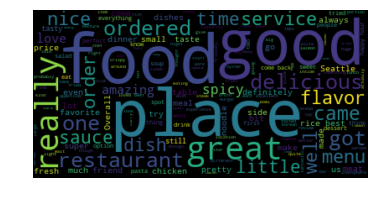

In [17]:
text = " ".join(review for review in good_revs.removed_stopwords_reviews)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

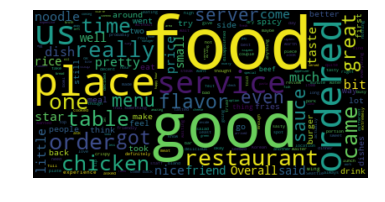

In [18]:
text = " ".join(review for review in bad_revs.removed_stopwords_reviews)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
good_revs["removed_stopwords_reviews"]= good_revs["removed_stopwords_reviews"].str.replace("good", " ", case = False) 
good_revs["removed_stopwords_reviews"]= good_revs["removed_stopwords_reviews"].str.replace("food", " ", case = False) 
good_revs["removed_stopwords_reviews"]= good_revs["removed_stopwords_reviews"].str.replace("great", " ", case = False)
good_revs["removed_stopwords_reviews"]= good_revs["removed_stopwords_reviews"].str.replace("really", " ", case = False) 
good_revs["removed_stopwords_reviews"]= good_revs["removed_stopwords_reviews"].str.replace("one", " ", case = False) 

bad_revs["removed_stopwords_reviews"]= bad_revs["removed_stopwords_reviews"].str.replace("good", " ", case = False) 
bad_revs["removed_stopwords_reviews"]= bad_revs["removed_stopwords_reviews"].str.replace("food", " ", case = False) 
bad_revs["removed_stopwords_reviews"]= bad_revs["removed_stopwords_reviews"].str.replace("great", " ", case = False)
bad_revs["removed_stopwords_reviews"]= bad_revs["removed_stopwords_reviews"].str.replace("really", " ", case = False) 
bad_revs["removed_stopwords_reviews"]= bad_revs["removed_stopwords_reviews"].str.replace("one", " ", case = False) 



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

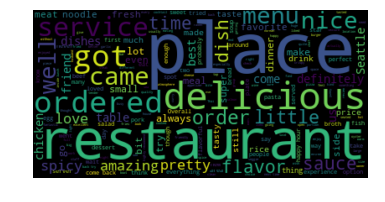

In [20]:
text = " ".join(review for review in good_revs.removed_stopwords_reviews)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

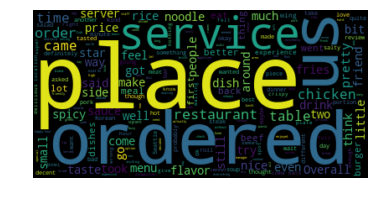

In [21]:
text = " ".join(review for review in bad_revs.removed_stopwords_reviews)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Step 6: Exploratory Data Analysis


In [23]:
query = pd.read_json('test_data/query.json')

In [24]:
query

,catId,catName,closeTime,dayOfWeek,hourId,hoursOpen,numReviews,openTime,rating,resAddress,resCatID,resId,resName,yelpUrl
0,41,Chinese,15:00:00,Mon,1,5.0,148 reviews,10:00:00,3,4545 University Way NE,59,149,Red Pepper,http://yelp.com/biz/red-pepper-seattle?osq=Res...
1,41,Chinese,15:00:00,Tue,2,5.0,148 reviews,10:00:00,3,4545 University Way NE,59,149,Red Pepper,http://yelp.com/biz/red-pepper-seattle?osq=Res...
2,41,Chinese,15:00:00,Wed,3,5.0,148 reviews,10:00:00,3,4545 University Way NE,59,149,Red Pepper,http://yelp.com/biz/red-pepper-seattle?osq=Res...
3,41,Chinese,15:00:00,Thu,4,5.0,148 reviews,10:00:00,3,4545 University Way NE,59,149,Red Pepper,http://yelp.com/biz/red-pepper-seattle?osq=Res...
4,41,Chinese,15:00:00,Fri,5,5.0,148 reviews,10:00:00,3,4545 University Way NE,59,149,Red Pepper,http://yelp.com/biz/red-pepper-seattle?osq=Res...
5,41,Chinese,22:00:00,Sat,6,12.0,148 reviews,10:00:00,3,4545 University Way NE,59,149,Red Pepper,http://yelp.com/biz/red-pepper-seattle?osq=Res...
6,41,Chinese,22:00:00,Sun,7,12.0,148 reviews,10:00:00,3,4545 University Way NE,59,149,Red Pepper,http://yelp.com/biz/red-pepper-seattle?osq=Res...
7,42,Japanese,22:00:00,Mon,8,11.0,343 reviews,11:00:00,4,5201 University Way NE,60,150,Teriyaki 1st,http://yelp.com/biz/teriyaki-1st-seattle-2?osq...
8,43,Korean,22:00:00,Mon,8,11.0,343 reviews,11:00:00,4,5201 University Way NE,61,150,Teriyaki 1st,http://yelp.com/biz/teriyaki-1st-seattle-2?osq...
9,42,Japanese,22:00:00,Tue,9,11.0,343 reviews,11:00:00,4,5201 University Way NE,60,150,Teriyaki 1st,http://yelp.com/biz/teriyaki-1st-seattle-2?osq...


### Correlation Matrix, using kendall method
Result: There is a -.225977 correlation between what the rating is based on how many hours the restaurant is open.

In [25]:
query.corr(method ='kendall') 


,catId,hourId,hoursOpen,rating,resCatID,resId
catId,1.000000,0.720711,0.150729,0.334348,0.813131,0.776707
hourId,0.720711,1.000000,0.184488,0.251803,0.880163,0.927905
hoursOpen,0.150729,0.184488,1.000000,-0.225977,0.205830,0.216994
rating,0.334348,0.251803,-0.225977,1.000000,0.257404,0.271367
resCatID,0.813131,0.880163,0.205830,0.257404,1.000000,0.948548
resId,0.776707,0.927905,0.216994,0.271367,0.948548,1.000000


In [26]:
#This shows how many unique values of hours open there are, meaning how many points should show on the graph
query['hoursOpen'].nunique()

6

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


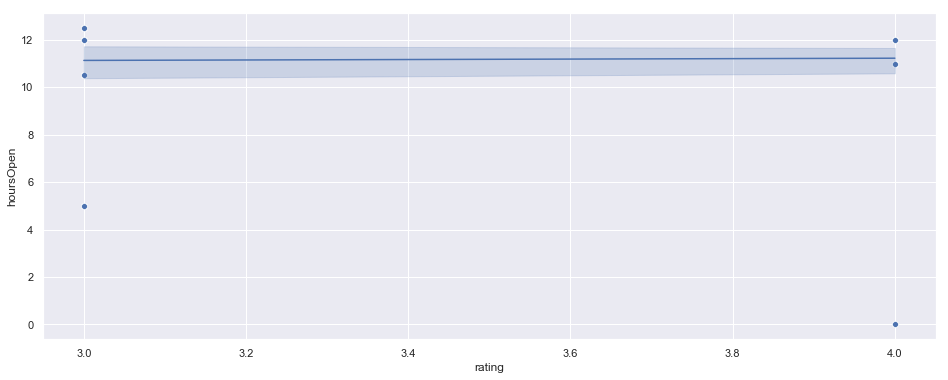

In [27]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x='rating', y='hoursOpen', data=query)
ax = sns.lineplot(x='rating', y='hoursOpen', data=query)


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


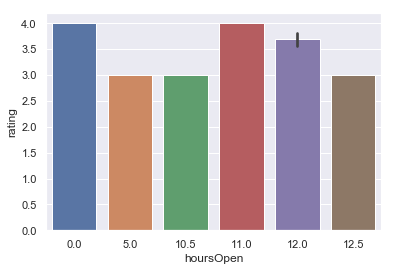

In [28]:
ax = sns.barplot(x='hoursOpen', y='rating', data=query)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


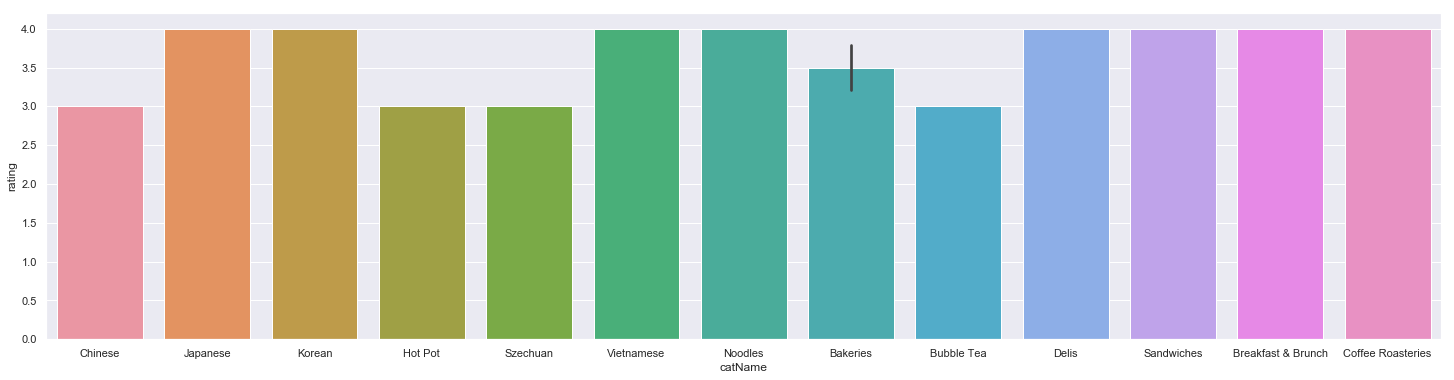

In [29]:
plt.figure(figsize=(25, 6))
ax = sns.barplot(x='catName', y='rating', data=query)

### Specific categories and attributes + their counts in good and bad reviews

In [30]:
GoodApps = good_revs.review.str.contains(r'appetizer').sum()
BadApps = bad_revs.review.str.contains(r'appetizer').sum()

print("Appetizers show up", GoodApps ,"times in a good review")
print("Appetizers show up",BadApps ,"times in a bad review")


Appetizers show up 70 times in a good review
Appetizers show up 22 times in a bad review


In [31]:
GHH = good_revs.review.str.contains(r'Happy Hour').sum()
BHH = bad_revs.review.str.contains(r'Happy Hour').sum()

print("Happy Hour shows up", GHH ,"times in a good review")
print("Happy Hour shows up",BHH ,"times in a bad review")

Happy Hour shows up 7 times in a good review
Happy Hour shows up 5 times in a bad review


In [32]:
GService = good_revs.review.str.contains(r'Service').sum()
BService = bad_revs.review.str.contains(r'Service').sum()

print("Service shows up", GService ,"times in a good review")
print("Service shows up",BService ,"times in a bad review")

Service shows up 83 times in a good review
Service shows up 33 times in a bad review


In [33]:
GAmbience = good_revs.review.str.contains(r'Ambience').sum()
BAmbience = bad_revs.review.str.contains(r'Ambience').sum()

print("Ambience shows up", GAmbience ,"times in a good review")
print("Ambience shows up",BAmbience ,"times in a bad review")

Ambience shows up 5 times in a good review
Ambience shows up 1 times in a bad review


## Step 7: Export data from pandas to json to reupload to Azure Data Studio. 


In [34]:
reviews.to_json(r'\CleanedReviews.json',orient='split')
